In [52]:
import pandas as pd
import matplotlib as plt
import numpy as np
import json
import requests

In [53]:
%matplotlib inline

In [54]:
url = 'https://pomber.github.io/covid19/timeseries.json'
filedata = requests.get(url)
data = json.loads(filedata.content)

In [55]:
df = pd.DataFrame()
df['date'] = [m['date'] for m in data['Germany']]
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df['de'] = [m['confirmed'] for m in data['Germany']]
df['de/dt'] = np.gradient(df.get('de','confirmed'))
df['de/dt2'] = np.gradient(df.get('de/dt','confirmed'))
df['de-rem'] = [m['recovered'] for m in data['Germany']]
df['de-abs'] = df['de'] - df['de-rem']
#df['fr'] = [m['confirmed'] for m in data['France']]
#df['fr/dt'] = np.gradient(df.get('fr','confirmed'))
#df['fr/dt2'] = np.gradient(df.get('fr/dt','confirmed'))
#df['it'] = [m['confirmed'] for m in data['Italy']]
#df['it/dt'] = np.gradient(df.get('it','confirmed'))
#df['it/dt2'] = np.gradient(df.get('it/dt','confirmed'))
#df['it-rem'] = [m['recovered'] for m in data['Italy']]
#df['it-abs'] = df['it'] - df['it-rem']
#df['ph'] = [m['confirmed'] for m in data['Philippines']]
#df['ph/dt'] = np.gradient(df.get('ph','confirmed'))
#df['ph/dt2'] = np.gradient(df.get('ph/dt','confirmed'))
#df['us'] = [m['confirmed'] for m in data['US']]
#df['us/dt'] = np.gradient(df.get('us','confirmed'))
#df['us/dt2'] = np.gradient(df.get('us/dt','confirmed'))
#df['us-rem'] = [m['recovered'] for m in data['US']]
#df['us-abs'] = df['us'] - df['us-rem']

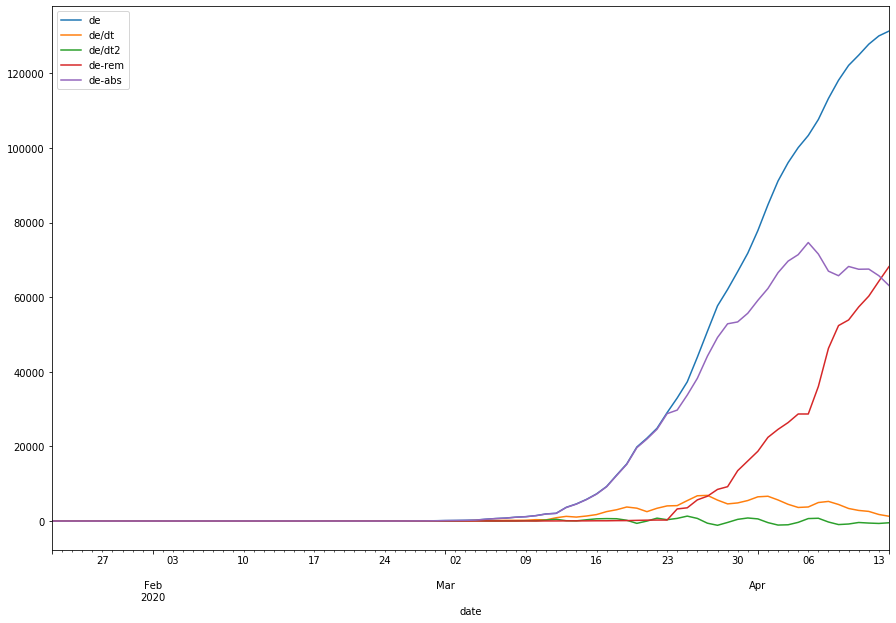

In [56]:
df.plot(figsize=(15,10))

In [57]:
print("Total cases [de]: %", df['de'][-1])
print("New cases rate [de]: %", df['de/dt'][-1])
print("New cases rate change [de]: %", df['de/dt2'][-1])

Total cases [de]: % 131359
New cases rate [de]: % 1287.0
New cases rate change [de]: % -465.5


In [58]:
intensive_care_capacity = 30000
intensive_care_factor = 1/100
infection_duration_days = 21

population0 = 83019213
infected0 = 28784
immune0 = 422

healthy0 = population0 - infected0 - immune0

infection_factors = [x/10 for x in range(100,250)]
infection_duration = 14

healthy = list([healthy0])
infected = list([infected0])
new_infected = list([0])
immune = list([immune0])

day = 0

In [25]:
def model_progress(infection_factor, healthy, infected, immune):
    infected_n = infected[-1] * infection_factor * ((population0-immune[-1]-infected[-1])/population0)
    new_infected_n = infected_n - infected[-1]
    if len(immune) > infection_duration:
        immune_n = immune[-1] + (infected[-infection_duration] - infected[-infection_duration-1])
    else:
        immune_n = immune[-1]
    healthy_n = healthy[-1] - (infected_n - infected[-1])
    
    return healthy_n, infected_n, new_infected_n, immune_n

In [117]:
for day in range(1,365):
    healthy_n, infected_n, new_infected_n, immune_n = model_progress(1.3, healthy, infected, immune)
    healthy.append(healthy_n)
    infected.append(infected_n)
    new_infected.append(new_infected_n)
    immune.append(immune_n)
    

In [118]:
df = pd.DataFrame({'healthy' : healthy, 'infected' : infected, 'new' : new_infected, 'immune' : immune})

df.describe()

,healthy,infected,new,immune
count,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02
mean,7.382603e+07,9.192758e+06,2.618558e+04,8.797346e+06
std,2.526395e+06,2.526395e+06,2.832610e+05,3.077529e+06
min,6.665525e+07,2.878400e+04,-9.281771e+05,4.220000e+02
25%,7.329593e+07,9.326386e+06,-1.817912e+04,9.129491e+06
50%,7.343005e+07,9.588745e+06,9.496854e+02,9.549077e+06
75%,7.369240e+07,9.722859e+06,3.178237e+04,9.694497e+06
max,8.299001e+07,1.636354e+07,1.382757e+06,1.633517e+07


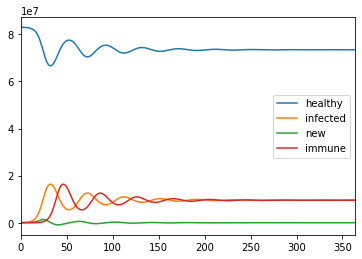

In [119]:
df.plot()